# Python Practice Lecture 13 MATH 342W Queens College - Polynomial Regression
## Author: Amir ElTabakh
## Date: March 15, 2021

## Agenda:
* Nonlinear Regression: Polynomial Regression
* Extrapolation vs Interpolation
* Overfitting with Polynomials

## Nonlinear Linear Regression: Polynomial Regression

Let's generate a polynomial model of degree 2, that is, $f = h^* \in \mathcal{H}$ and let $\epsilon$ be random noise (the error due to ignorance) for $\mathbb{D}$.

In [1]:
# importing dependencies
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # calculates RMSE
import pandas as pd
import seaborn as sns

<AxesSubplot:>

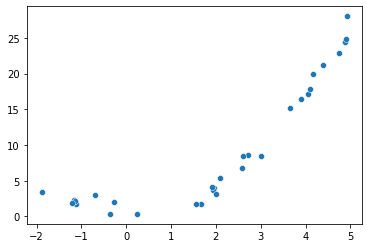

In [2]:
# Set seed
np.random.seed(1640)

# Generating h_*
n = 30
beta_0 = 1
beta_1 = 0
beta_2 = 1

x = np.random.uniform(low=-2.0, high=5.0, size=n)

# best possible model
h_star_x = beta_0 + beta_1 * x + beta_2 * x**2

# actual data differs due to information we don't have
epsilon = [np.random.normal(0, 1) for i in range(n)]
y = h_star_x + epsilon

df = pd.DataFrame({'x':x, 'y':y, 'h_star_x':h_star_x})

sns.scatterplot(data = df, x = x, y = y)

Let's try to estimate with a line:

In [3]:
# importing dependencies
from typing import Sequence, Union
import numpy as np
import matplotlib.pyplot as plt

# function to plot via slope and intercept.

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


# functions to plot polynomial expressions

Number = Union[int, float, complex]

def polyval(coefficients: Sequence[Number], x: Sequence[Number]) -> np.ndarray:
    # expand dimensions to allow broadcasting (constant time + inexpensive)
    # axis=-1 allows for arbitrarily shaped x
    x = np.expand_dims(x, axis=-1)
    powers = x ** np.arange(len(coefficients))
    return powers @ coefficients

def polyplot(coefficients: Sequence[Number], x: Sequence[Number]) -> None:
    y = polyval(coefficients, x)
    plt.plot(x, y)

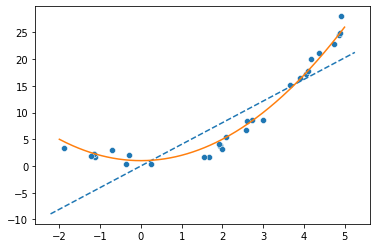

In [4]:
model = LinearRegression(fit_intercept = False)

model.fit(pd.DataFrame(df.x), pd.DataFrame(df.y))

slope = model.coef_[0][0]
intercept = model.intercept_

# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plot model regression line
abline(slope, intercept)

# plotting h_star_x
polyplot(np.array([beta_0, beta_1, beta_2]), np.linspace(-2, 5, 300))

In [5]:
# output R^2 of dotted line
model.score(pd.DataFrame(df.x), pd.DataFrame(df.y))

0.7035670278464388

The relationship is "underfit". $\mathcal{H}$ is not rich enough right now to express something close to $f(x)$. But it is better than the null model!

Now let's do a polynomial regression of degree two. Let's do so manually:

In [6]:
# Set seed
np.random.seed(1640)

# defining X
X = [[1, x[i], x[i]**2] for i in range(len(x))]
X = pd.DataFrame(X)

X.head()

,0,1,2
0,1,3.649334,13.317639
1,1,3.894910,15.170325
2,1,4.745076,22.515743
3,1,-1.128937,1.274500
4,1,4.379849,19.183073


In [7]:
# solve for your b_vec
b = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
print(b)
print([beta_0, beta_1, beta_2])

0    0.342843
1   -0.219180
2    1.104987
dtype: float64
[1, 0, 1]


And we'll plot it.

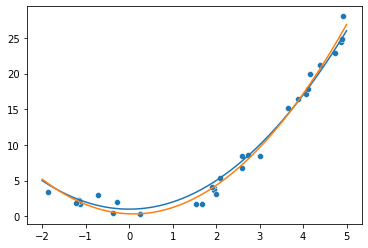

In [8]:
# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plot model regression line
#abline(slope, intercept)

# plotting h_star_x - Blue
polyplot(np.array([beta_0, beta_1, beta_2]), np.linspace(-2, 5, 300))

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(-2, 5, 300))

Now let's try polynomial of degree 3:

In [9]:
# Set seed
np.random.seed(1640)

# defining X
X = [[1, x[i], x[i]**2, x[i]**3] for i in range(len(x))]
X = pd.DataFrame(X)

X.head()

,0,1,2,3
0,1,3.649334,13.317639,48.600511
1,1,3.894910,15.170325,59.087054
2,1,4.745076,22.515743,106.838904
3,1,-1.128937,1.274500,-1.438830
4,1,4.379849,19.183073,84.018955


In [10]:
# solve for your b_vec
b = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
print(b)

0    0.609028
1   -0.182762
2    0.965918
3    0.026249
dtype: float64


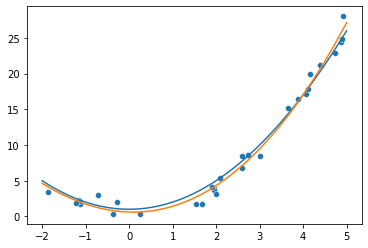

In [11]:
# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plot model regression line
#abline(slope, intercept)

# plotting h_star_x - Blue
polyplot(np.array([beta_0, beta_1, beta_2]), np.linspace(-2, 5, 300))

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(-2, 5, 300))

Still the same. Why? The $x^3$ term is like adding one "nonsense" predictor. One nonsense predictor marginally affects $R^2$ but it doesn't matter too much.

Now let's try polynomial of degree 8:

In [12]:
# Set seed
np.random.seed(1640)

# defining X
X = [[1, x[i], x[i]**2, x[i]**3,  x[i]**4, x[i]**5, x[i]**6, x[i]**7, x[i]**8] for i in range(len(x))]
X = pd.DataFrame(X)

X.head()

,0,1,2,3,4,5,6,7,8
0,1,3.649334,13.317639,48.600511,177.359497,647.244039,2362.009671,8619.762172,31456.391060
1,1,3.894910,15.170325,59.087054,230.138767,896.369822,3491.279933,13598.221704,52963.851957
2,1,4.745076,22.515743,106.838904,506.958682,2405.557303,11414.551400,54162.909982,257007.105667
3,1,-1.128937,1.274500,-1.438830,1.624349,-1.833789,2.070232,-2.337163,2.638510
4,1,4.379849,19.183073,84.018955,367.990295,1611.741751,7059.184739,30918.159892,135416.857109


In [13]:
# solve for your b_vec
b = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
print(b)

0    0.449798
1   -3.269151
2    1.516623
3    2.262595
4   -1.000335
5   -0.208365
6    0.217042
7   -0.047953
8    0.003467
dtype: float64


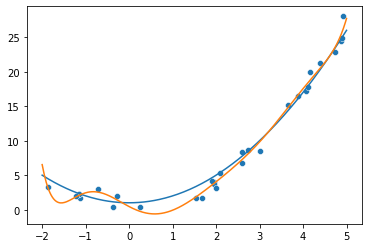

In [14]:
# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plot model regression line
#abline(slope, intercept)

# plotting h_star_x - Blue
polyplot(np.array([beta_0, beta_1, beta_2]), np.linspace(-2, 5, 300))

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(-2, 5, 300))

We are seeing now a little bit of "overfitting" in the edge(s). We now have $p=9$ and $n=100$. We can do a lot worse!

Now let's do polynomial of degree 13.

In [15]:
# Set seed
np.random.seed(1640)

# defining X
X = [[1, x[i], x[i]**2, x[i]**3,  x[i]**4, x[i]**5, x[i]**6, x[i]**7, x[i]**8,
      x[i]**9, x[i]**10, x[i]**11, x[i]**12, x[i]**13] for i in range(len(x))]

X = pd.DataFrame(X)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,3.649334,13.317639,48.600511,177.359497,647.244039,2362.009671,8619.762172,31456.391060,1.147949e+05,4.189248e+05,1.528797e+06,5.579090e+06,2.035996e+07
1,1,3.894910,15.170325,59.087054,230.138767,896.369822,3491.279933,13598.221704,52963.851957,2.062894e+05,8.034789e+05,3.129478e+06,1.218904e+07,4.747520e+07
2,1,4.745076,22.515743,106.838904,506.958682,2405.557303,11414.551400,54162.909982,257007.105667,1.219518e+06,5.786706e+06,2.745836e+07,1.302920e+08,6.182453e+08
3,1,-1.128937,1.274500,-1.438830,1.624349,-1.833789,2.070232,-2.337163,2.638510,-2.978713e+00,3.362780e+00,-3.796369e+00,4.285862e+00,-4.838470e+00
4,1,4.379849,19.183073,84.018955,367.990295,1611.741751,7059.184739,30918.159892,135416.857109,5.931053e+05,2.597711e+06,1.137758e+07,4.983209e+07,2.182570e+08


In [16]:
# solve for your b_vec
b = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
print(b)

0      0.492448
1      0.056234
2      5.577316
3     -7.321773
4     -6.361994
5     10.427066
6      0.269744
7     -4.580487
8      1.635947
9      0.309602
10    -0.334635
11     0.088897
12    -0.010615
13     0.000492
dtype: float64


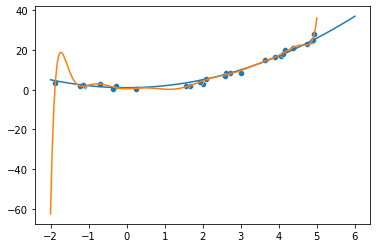

In [17]:
# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plot model regression line
#abline(slope, intercept)

# plotting h_star_x - Blue
polyplot(np.array([beta_0, beta_1, beta_2]), np.linspace(-2, 6, 300))

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(-2, 5, 300))

What's happening for small values of $x$ (and a bit for large values)? This is called [Runge's Phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) meaning that the boundary activity of high-order polynomials has very large derivatives.

## Extrapolation vs Interpolation

Let's take a look at the Galton Data used by Galton in 1885 to study the relationship between a parent's height and their childrens. We'll import it straight from a URL using Pandas' `.read_csv()` method.

In [18]:
# URL for Galton Height Data
url = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/HistData/Galton.csv"
galton_df = pd.read_csv(url)

galton_df = galton_df.iloc[:, 1:3]

galton_df.head()

,parent,child
0,70.5,61.7
1,68.5,61.7
2,65.5,61.7
3,64.5,61.7
4,64.0,61.7


In [19]:
model_g = LinearRegression(fit_intercept = True)

x = pd.DataFrame(galton_df["parent"])
y = pd.DataFrame(galton_df["child"])

model_g.fit(x, y)

b_0 = model_g.intercept_
b_1 = model_g.coef_[0]

print(b_0, b_1)

[23.94153018] [0.64629058]


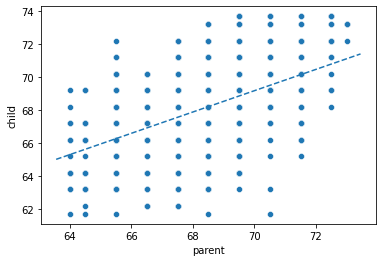

In [20]:
sns.scatterplot(data = galton_df, x = "parent", y = "child")

# plot model regression line
abline(b_1, b_0)

The `Seaborn` jitter functionality is currently unavailable for scatter plots, so we'll create our own function for it.

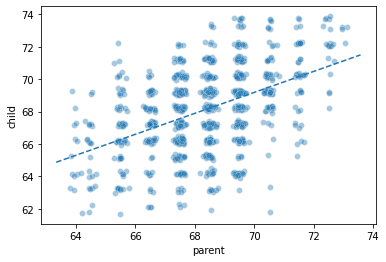

In [21]:
# add jitter to object
def jitter(values,j = 0):
    return values + np.random.normal(j, 0.1, values.shape)

sns.scatterplot(x = jitter(galton_df["parent"]), y = jitter(galton_df["child"]), alpha = 0.4)

# plot model regression line
abline(b_1, b_0)

Let's say I want to predict child's height for parents' average height of 70in. All I do is:

In [22]:
model_g.predict(pd.DataFrame({'parent':[70]}))[0][0]

69.18187091996771

What if I want to predict for a parents' height of 5in. Is there any 12in tall human being? No... it is absurd. But nothing stops you from doing:

In [23]:
model_g.predict(pd.DataFrame({'parent':[5]}))[0][0]

27.17298309038117

That's [actually possible](https://www.guinnessworldrecords.com/news/2012/2/shortest-man-world-record-its-official!-chandra-bahadur-dangi-is-smallest-adult-of-all-time/).

Look at our linear model from Euclid's perspective:

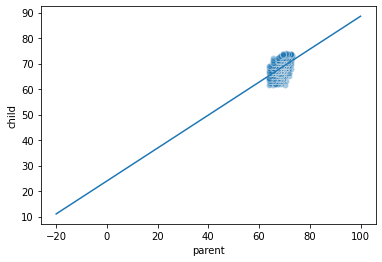

In [24]:
# plot data points
sns.scatterplot(x = jitter(galton_df["parent"]), y = jitter(galton_df["child"]), alpha = 0.4)

b = [model_g.intercept_[0], model_g.coef_[0][0]]

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(-20, 100, 300))

What is a linear model with $p + 1 = 2$. It's just a line. When geometry was first formalised by Euclid in the Elements, he defined a line to have "breadthless length" with a straight line being a line "which lies evenly with the points on itself". By "breadthless" he meant infinite in either direction. There is no mathematical problem with predicting childrens' heights using negative parents' heights e.g.

In [25]:
model_g.predict(pd.DataFrame({'parent':[-5]}))[0][0]

20.71007727044478

But this is absurd. So now we need to talk about a fundamental concept in data science we've been kind of avoiding and one that most people ignore. There are two types of prediction: interpolation and extrapolation. Interpolation is essentially the type of "prediction" we've been talking about this whole class. 

Extrapolation is totally different. It's what happens when you predict outside of the range of the covariate data you've seen in $\mathbb{D}$. Extrapolation is very dangerous - your models only work based on $\mathbb{D}$. Extrapolation is prediction outside of the range you've seen before which means you better have a good theoretical reason as to why your $\mathcal{H}$ function class will extend outside that range. Because each $\mathcal{H}$ function class will extrapolate very very differently.

## Overfitting with Polynomials

Can we achieve $R^2 = 100\%$ using polynomial regression? Yes. Here's an example in one dimension. These are called "interpolation polynomials". In one dimension, as long as the $x$ values are distinct, $n$ data points can be fit by a $n - 1$ degree polynomial. Here's an example with the same dataset we used in the beginning of the demo but with $n = 5$ instead.

<AxesSubplot:>

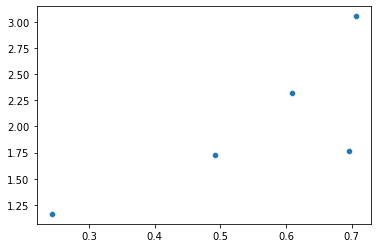

In [26]:
# Set seed
np.random.seed(1921)

# Generating h_*
n = 5
beta_0 = 1
beta_1 = 0
beta_2 = 1

x = np.random.uniform(low=0, high=1, size=n)

# best possible model
h_star_x = beta_0 + beta_1 * x + beta_2 * x**2

# actual data differs due to information we don't have
epsilon = [np.random.normal(0, 1) for i in range(n)]
y = h_star_x + epsilon

df = pd.DataFrame({'x':x, 'y':y, 'h_star_x':h_star_x})

# plot it
sns.scatterplot(data = df, x = x, y = y)

Now fit polynomial models.

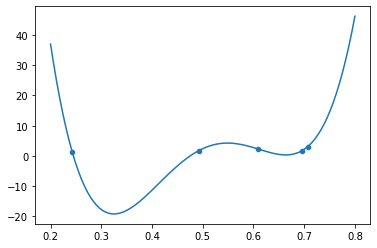

In [27]:
# Set seed
np.random.seed(2022)

# defining X
X = [[1, x[i], x[i]**2, x[i]**3, x[i]**4] for i in range(len(x))]
X = pd.DataFrame(X)

# solve for b_vec
b = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# plot data points
sns.scatterplot(data = df, x = x, y = y)

# plotting model polynomial - Orange
polyplot(np.array(b), np.linspace(0.2, 0.8, 100))

Perfect fit!

In [28]:
# R^2
model = LinearRegression(fit_intercept = False)
model.fit(X, y)
model.score(X, y)

1.0

This is the same thing we've seen before! If $n = p + 1$, then the design matrix is square and there is no need to project onto a lower dimensional subspace. To estimate the linear model, one only needs to solve $n$ equations with $n$ unknowns.

My recommendations:
1) Keep polynomial degree low. Preferably 2. Anything past 2 is not interpretable anyway. We didn't talk about "interpretability" of models yet, but you get the idea.
2) Be very careful not to extrapolate: make sure future predictions have the measurements within range of the training data $\mathbb{D}$. Extrapolations are going to be very, very inaccurate. Polynomial regressions I'm sure have gotten data scientists fired before.
